In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('london_merged.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.weather_code.value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [7]:
df.season.value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [8]:
new_cols_dict ={
    'timestamp':'time',
    'cnt':'count',
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity',
    'wind_speed': 'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'              
}

# Renaming the columns to the specified column names
new_cols_dict ={
    'timestamp':'time',
    'cnt':'count',
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity',
    'wind_speed': 'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'              
}

# Renaming the columns to the specified column names
new_cols_dict ={
    'timestamp':'time',
    'cnt':'count',
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity',
    'wind_speed': 'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'              
}

# Renaming the columns to the specified column names
df.rename(new_cols_dict, axis=1,inplace=True)

In [9]:
# Creating a season dictionary so that we can map the integers 0-3 to the actual written values
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

# Creating a weather dictionary so that we can map the integers to the actual written values 
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}
# Changing the seasons column data type to string
df.season = df.season.astype('str')
# Mapping the value 0-3 to the actual written seasons
df.season = df.season.map(season_dict)

# Changing the weather column data type to string
df.weather = df.weather.astype('str')
# Mapping the value 0-3 to the actual written weathers
df.weather = df.weather.map(weather_dict)

In [10]:
df.to_csv('london_bike_cleaned.csv', index=False)

In [11]:
# To understand how weather affects bike usage, we can look at the correlation between 'count' and weather-related variables.
# Let's calculate the correlation matrix for the dataset
correlation_matrix = df[['count', 'temp_real_C', 'temp_feels_like_C', 'humidity', 'wind_speed_kph']].corr()

# We'll also look at the average bike counts for different weather conditions
average_count_per_weather = df.groupby('weather')['count'].mean().sort_values(ascending=False)

# Display the correlation matrix and the average bike counts per weather condition
correlation_matrix, average_count_per_weather

(                      count  temp_real_C  temp_feels_like_C  humidity  \
 count              1.000000     0.388798           0.369035 -0.462901   
 temp_real_C        0.388798     1.000000           0.988344 -0.447781   
 temp_feels_like_C  0.369035     0.988344           1.000000 -0.403495   
 humidity          -0.462901    -0.447781          -0.403495  1.000000   
 wind_speed_kph     0.116295     0.145471           0.088409 -0.287789   
 
                    wind_speed_kph  
 count                    0.116295  
 temp_real_C              0.145471  
 temp_feels_like_C        0.088409  
 humidity                -0.287789  
 wind_speed_kph           1.000000  ,
 weather
 Scattered clouds          1496.177491
 Broken clouds             1195.124472
 Clear                     1162.088943
 Rain                       712.966371
 Cloudy                     635.230874
 Rain with thunderstorm     583.428571
 Snowfall                   250.850000
 Name: count, dtype: float64)

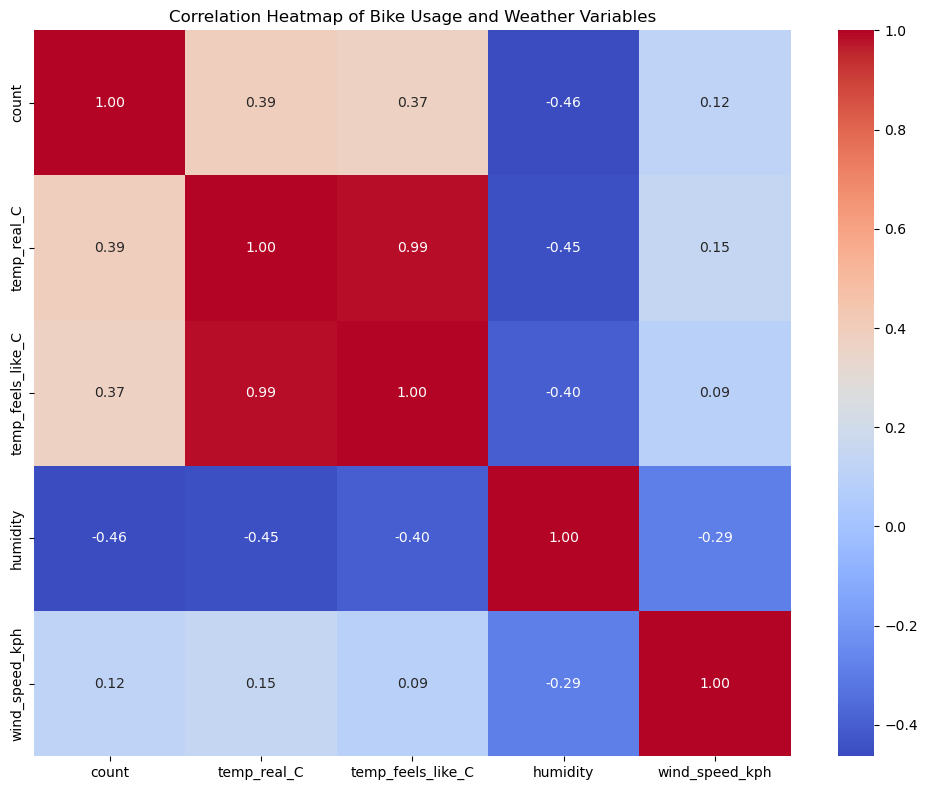

In [12]:
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Title for the heatmap
plt.title('Correlation Heatmap of Bike Usage and Weather Variables')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

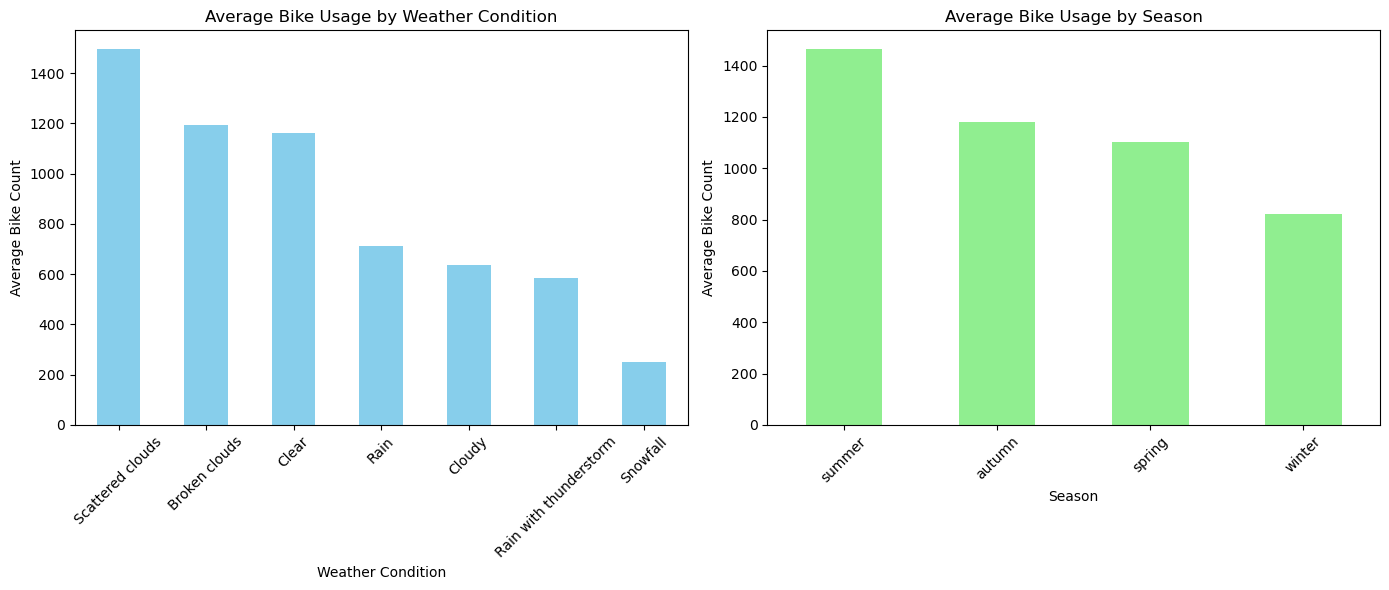

In [14]:
# Grouping by weather conditions and seasons to see the average bike count
weather_grouped = df.groupby('weather')['count'].mean().sort_values(ascending=False)
season_grouped = df.groupby('season')['count'].mean().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
weather_grouped.plot(kind='bar', color='skyblue')
plt.title('Average Bike Usage by Weather Condition')
plt.ylabel('Average Bike Count')
plt.xlabel('Weather Condition')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
season_grouped.plot(kind='bar', color='lightgreen')
plt.title('Average Bike Usage by Season')
plt.ylabel('Average Bike Count')
plt.xlabel('Season')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

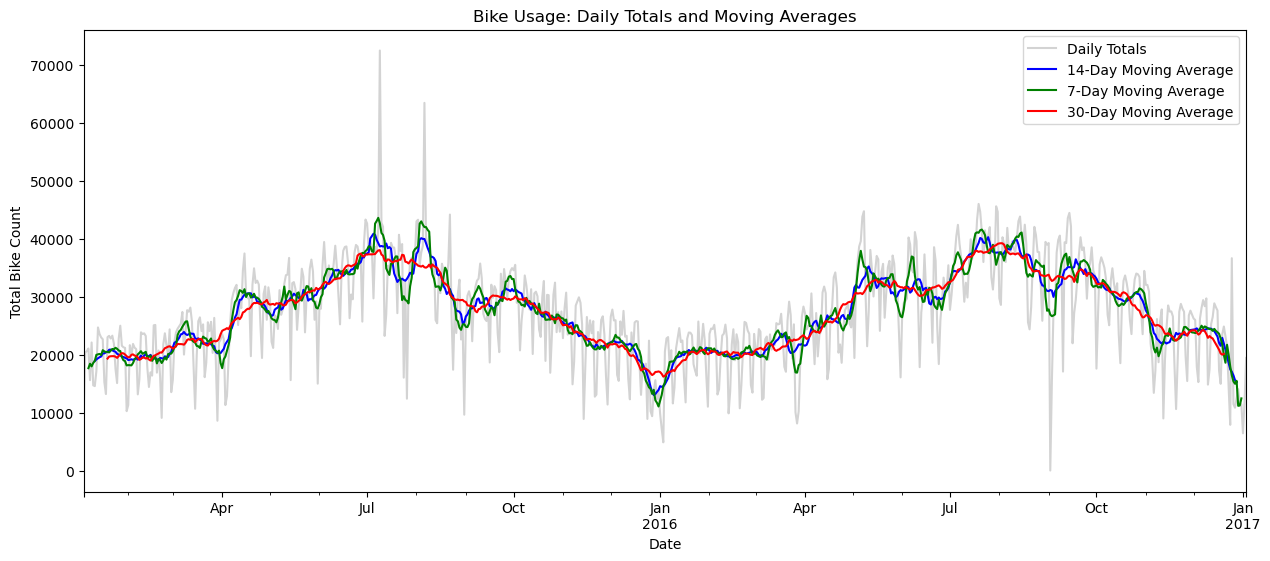

In [15]:
# Convert 'time' to datetime and set it as the index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Resampling to get daily totals
daily_totals = df['count'].resample('D').sum()

# Calculating rolling averages
rolling_14d = daily_totals.rolling(window=14, center=True).mean()
rolling_7d = daily_totals.rolling(window=7, center=True).mean()
rolling_30d = daily_totals.rolling(window=30, center=True).mean()

# Plotting the rolling averages
plt.figure(figsize=(15, 6))
daily_totals.plot(label='Daily Totals', color='lightgray')
rolling_14d.plot(label='14-Day Moving Average', color='blue')
rolling_7d.plot(label='7-Day Moving Average', color='green')
rolling_30d.plot(label='30-Day Moving Average', color='red')
plt.title('Bike Usage: Daily Totals and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Total Bike Count')
plt.legend()
plt.show()